# Shot/Goal Creating Actions Feature Exploration

Exploratory Data Analysis of features related to shot/goal creating actions.

In [1]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
#load the att_explore dataframe in 
att_explore = pd.read_csv('att_explore.csv')
att_explore.head()

,Unnamed: 0,Player ID,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,...,RW,WB,Defenders,Midfielders,Wide Midfielders,Wingers,Penalty Success Rate,SOT Percentage,Team Goals,Pass Completion Percentage
0,10000,140,Sun,32,Away,L 1–2,Crystal Palace,Leicester City,Y,DM,...,0,0,0,1,0,0,NaN,0.0,1,83.783784
1,24977,340,Sat,29,Away,L 1–2,Bournemouth,Liverpool,N,LW,...,0,0,0,0,0,1,NaN,NaN,1,71.428571
2,37756,498,Sun,37,Away,D 0–0,Huddersfield,Manchester City,Y,CM,...,0,0,0,1,0,0,NaN,NaN,0,58.823529
3,18759,262,Sun,34,Away,D 2–2,Southampton,Brighton,N,LM,...,0,0,0,0,1,0,NaN,0.0,2,81.818182
4,168,3,Sun,38,Home,W 5–0,Manchester City,Norwich City,Y*,LM,...,0,0,0,0,1,0,NaN,0.2,5,87.500000


### Shot/Goal Creating Actions Feature Exploration

Shot Creating Actions refer to any action (Live Ball, Deadball, Dribble etc.) that results in a shot. Goal Creating Actions refer to any action that results in a goal. As both of these metrics primarily capture information that has to do with the creativity of a player (i.e. their ability to perform different types of actions that result in either shots or goals), we don't expect there to be a strong relationship between these metrics and 'Goals. 

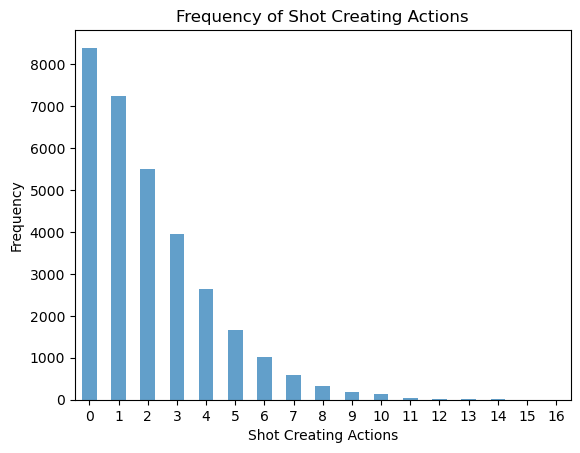

In [3]:
sca_count = att_explore['Shot Creating Actions'].value_counts().sort_index()

fig, ax = plt.subplots()

sca_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Shot Creating Actions')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Shot Creating Actions')

plt.xticks(rotation = 0)
plt.show()

Majority of the observations have SCA equal to zero. The dataframe also contains information about each type of SCA (Deadball, Live, Dribble etc.). We first want to make sure that the sum of the different types of SCA is equal to the total SCA for each observation. We then want to plot the frequency of each type of SCA for each total SCA value. 

In [4]:
(att_explore['Shot Creating Actions'] == att_explore['Live SCA'] + att_explore['Deadball SCA'] + att_explore['Take-on SCA'] 
 + att_explore['Shot SCA'] + att_explore['Foul SCA'] + att_explore['Defense SCA']).sum() - len(att_explore)

0

The above code confirms that the Total SCA is equal to the sum of each constituent SCA for all of the observations. 

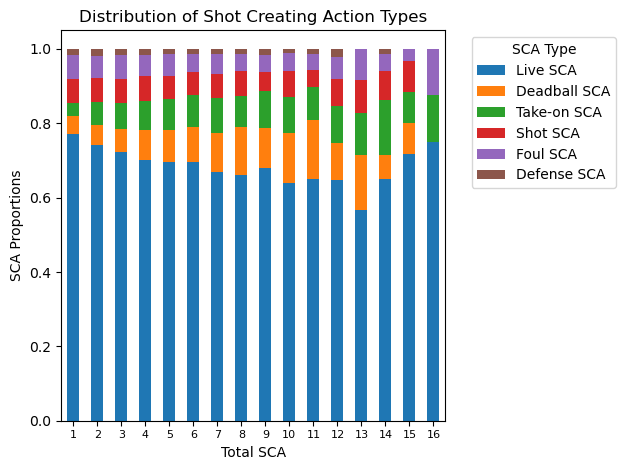

In [5]:
#sca_types is a new dataframe that only includes the columns related to Shot Creating Actions
sca_types = att_explore[['Live SCA', 'Deadball SCA', 'Take-on SCA', 'Shot SCA', 'Foul SCA', 'Defense SCA', 'Shot Creating Actions']].copy()

#grouping the Shot Creating Actions and then summing 
grouped_sca = sca_types.groupby('Shot Creating Actions').sum()
total_sca = grouped_sca.sum(axis = 1)

#proportion of each sca type 
sca_prop = grouped_sca.div(total_sca, axis = 0)

#drop the first row (this is the row for 0 shot creating actions)
sca_prop = sca_prop[sca_prop.index != 0]

#plotting the results
fig, ax = plt.subplots()

sca_prop.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Shot Creating Action Types')
ax.set_xlabel('Total SCA')
ax.set_ylabel('SCA Proportions')
ax.legend(title = 'SCA Type', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

We can see that Live SCA dominates the Total SCA across the board. The proportion of SCA being Deadball SCA also increases as the Total SCA increases. This is likewise the case with Take-on SCA. The proportion of SCA being Shot SCA stays relatively constant throughout, whilst it appears that the proportion of Foul SCA decreases as the Total SCA increases. 

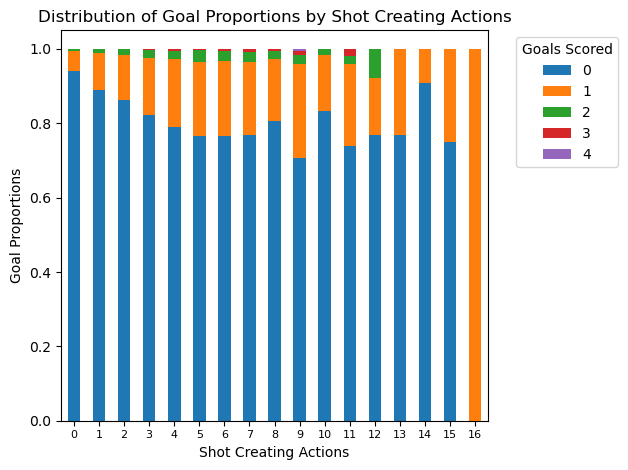

In [6]:
goals_by_sca = att_explore.groupby(['Shot Creating Actions', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_sca = goals_by_sca.div(goals_by_sca.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_sca.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Shot Creating Actions')
ax.set_xlabel('Shot Creating Actions')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

There seems to be a steady increase in the proportion of observations having scored at least 1 goal as the number of shot creating actions increaes from 0 to 5. However, this pattern seems to tail off and become quite erratic. Whether or not this is due to a small sample size is unclear. The fact that increasing SCA leads to an increased proportion of observations having scored at least 1 goal isn't necessarily surprising, since attacking players are simultaneously more likely to accumulate SCA's as well as goals. We could potentially look into this by reproducing the same plot, but only for attacking players for example. If what we said is true, we would expect to see no/little relationship between SCA and Goal Proportions. 

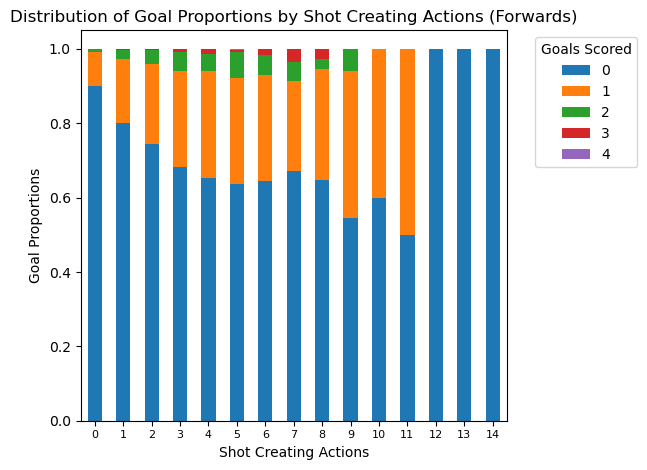

In [7]:
attackers_condition = (att_explore['FW'] == 1) 
attackers_sca_df = att_explore[attackers_condition][['Shot Creating Actions', 'Goals']]

attackers_goals_by_sca = attackers_sca_df.groupby(['Shot Creating Actions', 'Goals']).size().unstack(fill_value = 0)
attackers_goalprop_by_sca = attackers_goals_by_sca.div(attackers_goals_by_sca.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

attackers_goalprop_by_sca.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Shot Creating Actions (Forwards)')
ax.set_xlabel('Shot Creating Actions')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

Perhaps surprisingly, the aforementioned pattern is still there. An increase in the number of total shot creating actions is associated with an increase in the proportion of observations recording at least 1 goal. Therefore, we should discard our initial hypothesis of there being no relationship between SCA and Goals. Let's have a look next at the relationship between Goals and different types of SCA. 

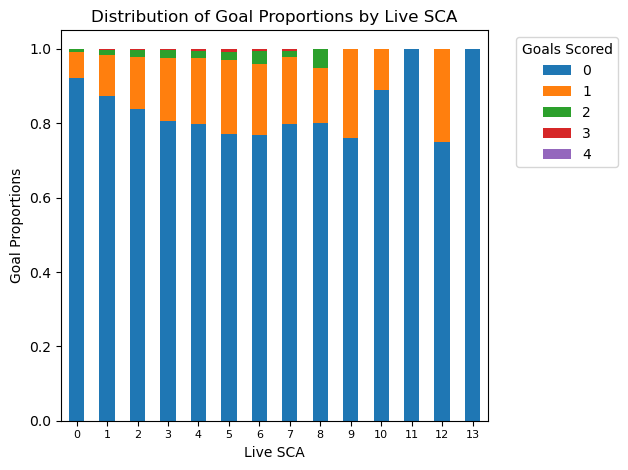

In [8]:
goals_by_livesca = att_explore.groupby(['Live SCA', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_sca = goals_by_livesca.div(goals_by_livesca.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_sca.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Live SCA')
ax.set_xlabel('Live SCA')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

Similar pattern to above, where we see a gradual increase in the proportion of observations recording at least 1 goal as the number of Live SCA increases up to a point. Then the pattern gets a bit messy. 

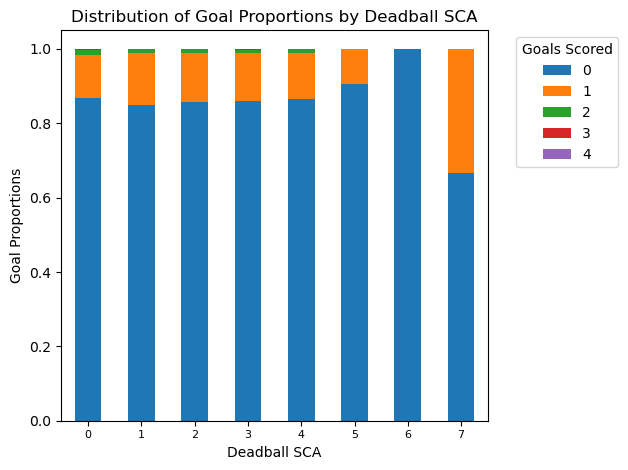

In [9]:
goals_by_deadballsca = att_explore.groupby(['Deadball SCA', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_deadballsca = goals_by_deadballsca.div(goals_by_deadballsca.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_deadballsca.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Deadball SCA')
ax.set_xlabel('Deadball SCA')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

It is interesting to see that there appears to be no relationship between Deadball SCA and Goal Proportions. We can see that the proportion of observations that have recorded at least 1 goal is basically the same regardless of the number of Deadball SCA. This does make sense, because we don't expect freekick or corner takers to be any more likely to score goals compared to other players. 

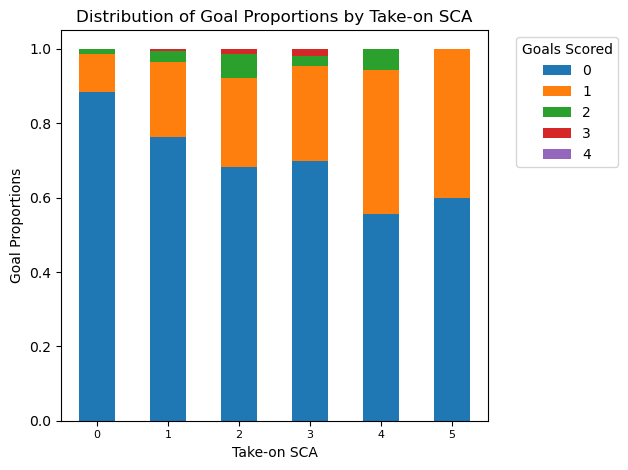

In [10]:
goals_by_takeonsca = att_explore.groupby(['Take-on SCA', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_takeonsca = goals_by_takeonsca.div(goals_by_takeonsca.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_takeonsca.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Take-on SCA')
ax.set_xlabel('Take-on SCA')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

There does appear to be a relationship between the proportion of observations that have recorded at least 1 goal and the number of Take-on SCA accumulated. 

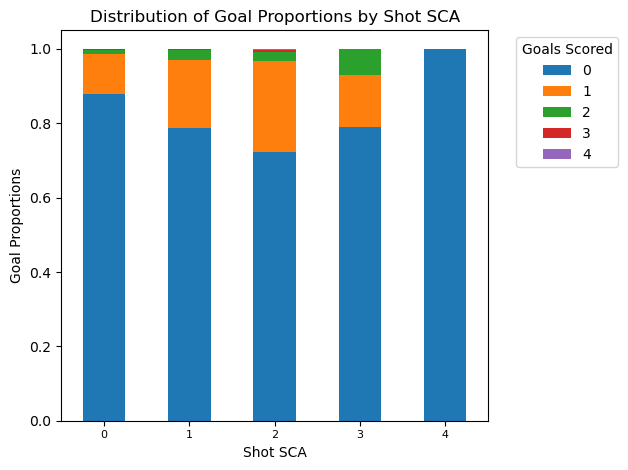

In [11]:
goals_by_shotsca = att_explore.groupby(['Shot SCA', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_shotsca = goals_by_shotsca.div(goals_by_shotsca.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_shotsca.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Shot SCA')
ax.set_xlabel('Shot SCA')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

Interestingly, there doesn't appear to be a relationship between Shot SCA and Goal Proportions. This surprising because I would've expected Shot SCA to have the strongest relationship with Goals, out of all of the different types of SCA. This is because those in a position to accumulate a shot creating action by having a shot themselves are probably the same players that are more likely to be in shooting positions. We saw previously the relationship between shots and goals, so there was some expectation from me of a relationship between these two features. However, the plot seems to say otherwise. 

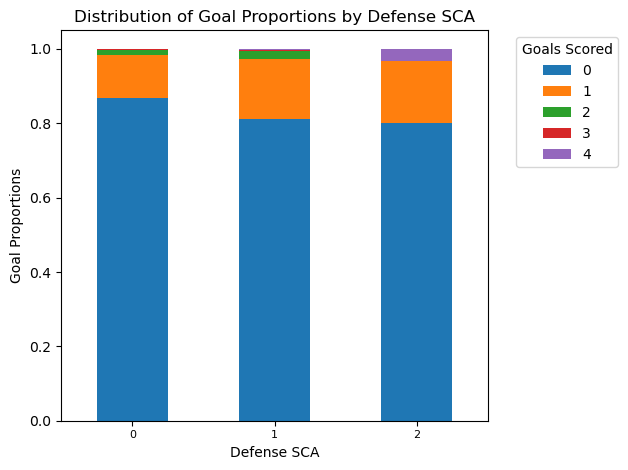

In [12]:
goals_by_defensesca = att_explore.groupby(['Defense SCA', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_defensesca = goals_by_defensesca.div(goals_by_defensesca.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_defensesca.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Defense SCA')
ax.set_xlabel('Defense SCA')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

The plot above shows us that it is unlikely there is any relationship between the number of Defense SCA and Goals. Although this is expected, we should also keep in mind that the number of observations with Defence SCA's is quite low. In other words, the small sample size may actually be hiding an underlying relationship, although this is unlikely. It is also interesting that there appears to be an observation that recorded 4 goals and 2 Defense SCA's, just for interest let's take a look. 

In [13]:
att_explore[(att_explore['Defense SCA'] == 2) & (att_explore['Goals'] == 4)]

,Unnamed: 0,Player ID,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,...,RW,WB,Defenders,Midfielders,Wide Midfielders,Wingers,Penalty Success Rate,SOT Percentage,Team Goals,Pass Completion Percentage
30630,2455,36,Sat,34,Home,W 5–1,Manchester City,Watford,Y,"RW,LW",...,1,0,0,0,0,1,1.0,0.6,5,86.363636


This observation refers to the data for Gabriel Jesus in the match he played for Man City vs Watford. The 2 defensive SCA is probably from Jesus tackling/intercepting the opposition passes which led to a shot. This tracks because Gabriel Jesus is known as one of the best pressers in the league. 

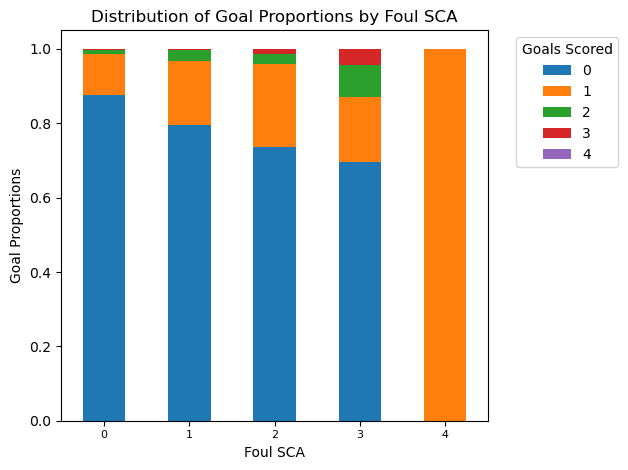

In [14]:
goals_by_foulsca = att_explore.groupby(['Foul SCA', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_foulsca = goals_by_foulsca.div(goals_by_foulsca.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_foulsca.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Foul SCA')
ax.set_xlabel('Foul SCA')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

There appears to be a significant relationship between the number of Foul SCA accumulated and the proportion of observations that record at least 1 goal. In fact, every single observation that recorded 4 Foul SCA scored 1 goal. Let's have a look to see whether this is a sample size issue. 

In [15]:
att_explore[att_explore['Foul SCA'] == 4]

,Unnamed: 0,Player ID,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,...,RW,WB,Defenders,Midfielders,Wide Midfielders,Wingers,Penalty Success Rate,SOT Percentage,Team Goals,Pass Completion Percentage
25576,21141,294,Sat,5,Away,D 2–2,Liverpool,Everton,Y,"LW,FW",...,0,0,0,0,0,1,NaN,0.5,2,75.675676


So we can see that there was only 1 observation in the entire dataset that recorded 4 Foul SCA's. 

The pattern that the plot above shows is quite unexpected. Let's try to investigate this further by first looking into what positions are more likely to accumulate Foul SCA. My impression is that players that play in either a FW or Winger position will accumulate the most Foul SCA. 

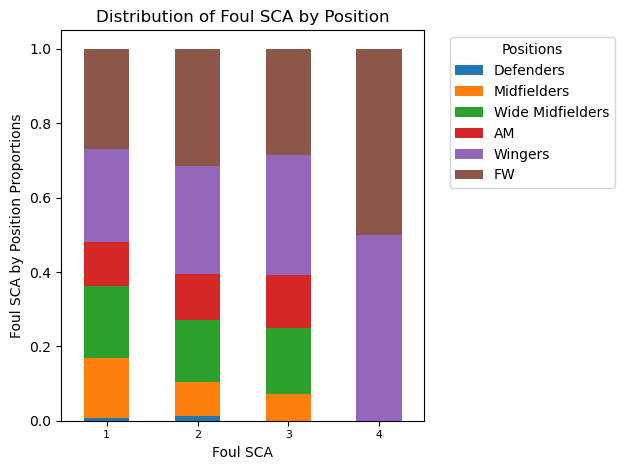

In [16]:
#foulsca_by_pos is a new dataframe that only includes the columns related to Shot Creating Actions
foulsca_by_pos = att_explore[['Foul SCA', 'Defenders', 'Midfielders', 'Wide Midfielders', 'AM', 'Wingers', 'FW']].copy()

#grouping the Shot Creating Actions and then summing 
grouped_foulsca = foulsca_by_pos.groupby('Foul SCA').sum()
total_foulsca = grouped_foulsca.sum(axis = 1)

#proportion of each sca type 
sca_prop = grouped_foulsca.div(total_foulsca, axis = 0)

#drop the first row (this is the row for 0 shot creating actions)
sca_prop = sca_prop[sca_prop.index != 0]

#plotting the results
fig, ax = plt.subplots()

sca_prop.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Foul SCA by Position')
ax.set_xlabel('Foul SCA')
ax.set_ylabel('Foul SCA by Position Proportions')
ax.legend(title = 'Positions', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

We can see that wingers and FW positions dominate the observations that have accumulated at least 1 Foul SCA. This is as expected. However, we can see that the proportion of either Wingers/FW that are accumulating Foul SCA doesn't increase with increases in Foul SCA. In other words, the pattern we saw previously cannot be attributed to the position played by each player. Let's now plot Foul SCA against xG to see if there is any noticeable relationship. 

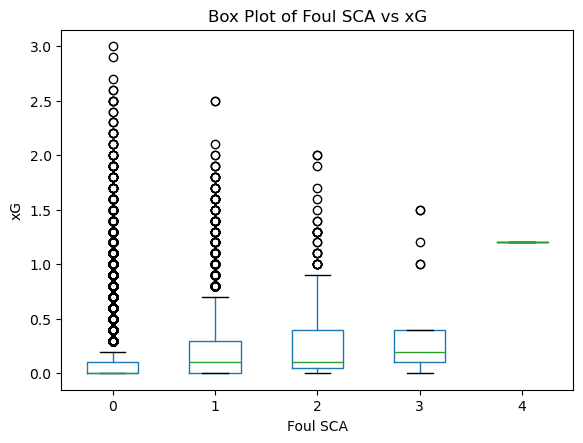

In [17]:
plt.figure
att_explore.boxplot(column = 'xG', by = 'Foul SCA', grid = False)
plt.title('Box Plot of Foul SCA vs xG')
plt.suptitle('')
plt.xlabel('Foul SCA')
plt.ylabel('xG')
plt.show()

So it appears that the median xG value for different Foul SCA doesn't really differ too much. There are also quite a few outliers especially for the observations with 0 Foul SCA. This is quite unexpected, given the pattern we saw between Foul SCA and Goal Proportions, as well as the known relationship between xG and Goals. 

Finally, let's have a quick look at the relationship between SCA and Assists. We expect there to be a stronger relationship between these two features, since SCA is a metric that better captures the creativity/chance creation of a player, rather than their ability to score goals. 

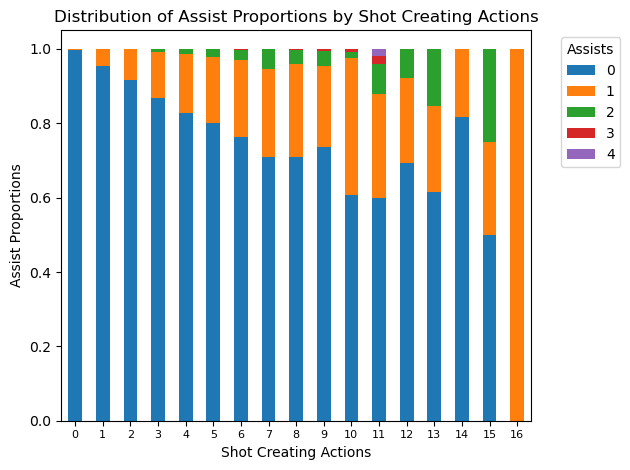

In [18]:
assists_by_sca = att_explore.groupby(['Shot Creating Actions', 'Assists']).size().unstack(fill_value = 0)
assistprop_by_sca = assists_by_sca.div(assists_by_sca.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

assistprop_by_sca.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Assist Proportions by Shot Creating Actions')
ax.set_xlabel('Shot Creating Actions')
ax.set_ylabel('Assist Proportions')
ax.legend(title = 'Assists', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

Similarly, we can see a steady increase in the proportion of observations that record an assist, as the number of SCA increases. This continues until approximately 7 SCA. After this point, the pattern gets a bit more muddled, but this is probably due to sample size issues. 

#### Goal Creating Actions (GCA)

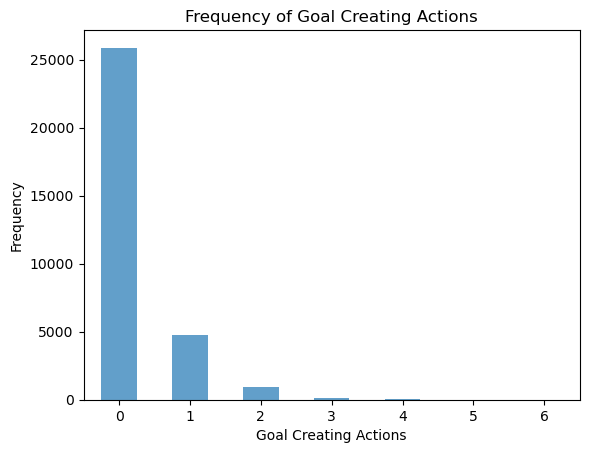

In [19]:
gca_count = att_explore['Goal Creating Actions'].value_counts().sort_index()

fig, ax = plt.subplots()

gca_count.plot(kind = 'bar', alpha = 0.7)

ax.set_xlabel('Goal Creating Actions')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Goal Creating Actions')

plt.xticks(rotation = 0)
plt.show()

In comparison to SCA, we can see that the number of observations with GCA = 0 is a lot more. It appears that it is more common for players to accumulate no GCA. 

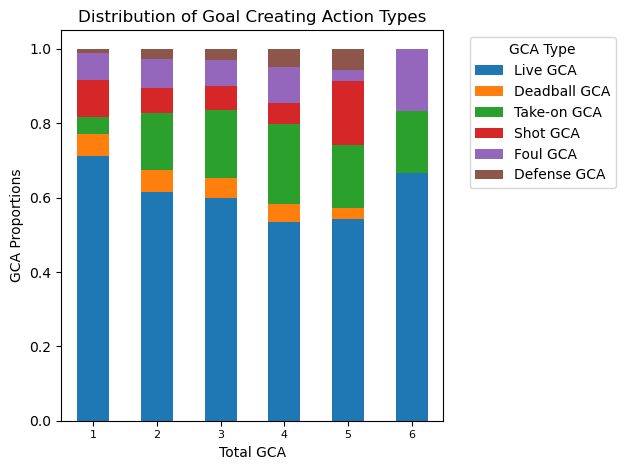

In [20]:
#gca_types is a new dataframe that only includes the columns related to Shot Creating Actions
gca_types = att_explore[['Live GCA', 'Deadball GCA', 'Take-on GCA', 'Shot GCA', 'Foul GCA', 'Defense GCA', 'Goal Creating Actions']].copy()

#grouping the Shot Creating Actions and then summing 
grouped_gca = gca_types.groupby('Goal Creating Actions').sum()
total_gca = grouped_gca.sum(axis = 1)

#proportion of each sca type 
gca_prop = grouped_gca.div(total_gca, axis = 0)

#drop the first row (this is the row for 0 shot creating actions)
gca_prop = gca_prop[gca_prop.index != 0]

#plotting the results
fig, ax = plt.subplots()

gca_prop.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Creating Action Types')
ax.set_xlabel('Total GCA')
ax.set_ylabel('GCA Proportions')
ax.legend(title = 'GCA Type', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

So once again, Live GCA dominates the types of GCA. This is closely followed by Take-on GCA (this is different to SCA, where the next most common type of SCA was Deadball SCA). There seem to be some outliers, where Shot GCA appears to be quite common when a player accumulates either 1 or 5 GCA, but much less common if the GCA accumulated is equal to 2, 3 or 4. In contrast to SCA, Deadball GCA is consistently one of the least common types of GCA. This perhaps speaks to the fact that deadballs (i.e. freekicks or corners) are good opportunities to generate a shot, but bad opportunities to generate a goal. In other words, a chance is generated, but not a very good chance. 

GCA and Assists appear to be closely related to each other. Let's first investigate the relationship between these two features. 

In [21]:
#first, let's look at whether or not GCA = Assists for each observation 
gca_notequal_assists = att_explore[~(att_explore['Goal Creating Actions'] == att_explore['Assists'])]
gca_notequal_assists

,Unnamed: 0,Player ID,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,...,RW,WB,Defenders,Midfielders,Wide Midfielders,Wingers,Penalty Success Rate,SOT Percentage,Team Goals,Pass Completion Percentage
4,168,3,Sun,38,Home,W 5–0,Manchester City,Norwich City,Y*,LM,...,0,0,0,0,1,0,NaN,0.200000,5,87.500000
7,5552,89,Sat,22,Home,W 1–0,Manchester City,Chelsea,Y*,AM,...,0,0,0,0,0,0,NaN,0.750000,1,65.000000
15,35001,463,Sun,21,Away,D 2–2,Liverpool,Chelsea,Y,CM,...,0,0,0,1,0,0,NaN,NaN,2,88.888889
16,38830,514,Sat,17,Home,W 3–0,Newcastle Utd,Fulham,Y,LW,...,0,0,0,0,0,1,NaN,0.250000,3,77.272727
17,5876,92,Sat,28,Away,D 1–1,Leicester City,Brentford,Y,DM,...,0,0,0,1,0,0,NaN,0.000000,1,73.170732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31704,3235,47,Sun,37,Home,D 1–1,Leeds United,Brighton,Y,FW,...,0,0,0,0,0,0,NaN,0.000000,1,42.307692
31712,1402,21,Sat,37,Home,L 2–3,Cardiff City,Crystal Palace,Y,"CM,FW",...,0,0,0,1,0,0,NaN,1.000000,2,76.190476
31723,10927,152,Sun,32,Away,L 1–2,Crystal Palace,Leicester City,Y,LW,...,0,0,0,0,0,1,0.0,0.250000,1,95.833333
31727,34087,454,Tue,5,Away,D 1–1,Everton,Leeds United,Y,RW,...,1,0,0,0,0,1,NaN,0.000000,1,77.777778


So there are 3949 observations where GCA does not equal Assists. Let's have a look at how the counts differ for these observations. 

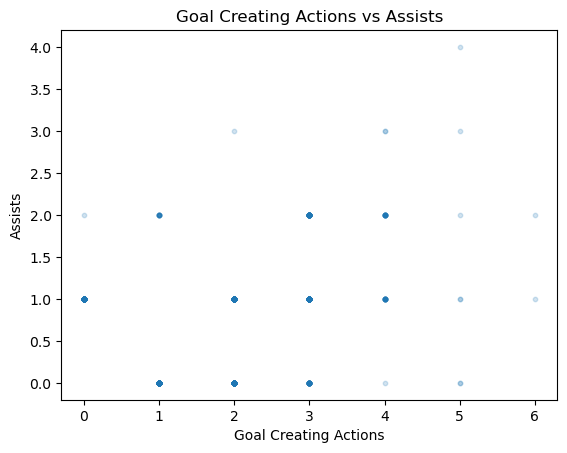

In [22]:
plt.figure()

plt.scatter(gca_notequal_assists['Goal Creating Actions'], gca_notequal_assists['Assists'], alpha = 0.2, s = 10)
plt.title('Goal Creating Actions vs Assists')
plt.xlabel('Goal Creating Actions')
plt.ylabel('Assists')
plt.show()

Interestingly, there are a wide range of possible combinations. For example, there are certain observations where the number of Assists is larger than the number of GCA (How is this possible?). There are also quite a few observations where the number of GCA are larger than the number of Assists. According to https://mtag.substack.com/p/data-explainers, a GCA is accumulated if the player is involved in of the last two offensive actions leading up to a goal. Although this explains why certain players have more GCA than Assists (for example, if they complete a take-on, pass the ball to another player who then assists the goal, this player will have accumulated 1 Take-on GCA, but not an assist), it doesn't explain why there are certain observatoins with more Assists than GCA. We can further filter the dataset to investigate. 

In [23]:
gca_notequal_assists[gca_notequal_assists['Assists'] > gca_notequal_assists['Goal Creating Actions']]

,Unnamed: 0,Player ID,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,...,RW,WB,Defenders,Midfielders,Wide Midfielders,Wingers,Penalty Success Rate,SOT Percentage,Team Goals,Pass Completion Percentage
48,27791,373,Wed,34,Away,W 3–1,Liverpool,Brighton,Y,RW,...,1,0,0,0,0,1,NaN,0.625,3,75.757576
91,2250,33,Sat,35,Home,W 2–0,Aston Villa,Norwich City,N,AM,...,0,0,0,0,0,0,NaN,0.000,2,90.909091
297,15101,204,Sat,29,Away,W 3–1,Crystal Palace,Burnley,Y,CM,...,0,0,0,1,0,0,NaN,0.000,3,75.000000
908,23217,322,Mon,2,Home,D 1–1,Liverpool,Crystal Palace,Y*,LM,...,0,0,0,0,1,0,NaN,0.000,1,80.487805
1202,846,15,Sun,35,Home,W 1–0,Everton,Chelsea,Y,LM,...,0,0,0,0,1,0,NaN,0.500,1,60.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30757,1142,17,Fri,9,Away,L 1–3,Aston Villa,Arsenal,N,RW,...,1,0,0,0,0,1,NaN,0.500,1,76.923077
31013,7759,119,Tue,5,Away,D 1–1,Everton,Leeds United,Y,LM,...,0,0,0,0,1,0,NaN,NaN,1,64.000000
31376,25836,351,Sun,32,Home,W 2–1,Leicester City,Crystal Palace,Y,RW,...,1,0,0,0,0,1,NaN,0.000,2,70.000000
31573,5124,81,Sat,34,Away,W 3–0,Newcastle Utd,Norwich City,Y,"LW,FW",...,0,0,0,0,0,1,NaN,1.000,3,79.545455


So there are actually 105 observations that have more Assists than GCA. The reason why it is possible to have more Assists than GCA is still unclear. A quick search online did not yield any results. I suspect it has something to do with how a GCA is defined, compared to an Assist. For example, there may be certain situations where an Assist is given to a player, but the nature of the assist is such that it doesn't fall under any of the GCA categories, so a GCA is then not given. 

Let's now have a quick look at the relationship between GCA and Goals. We don't expect there to be any particular relationship between these two features, for similar reasons as discussed above.

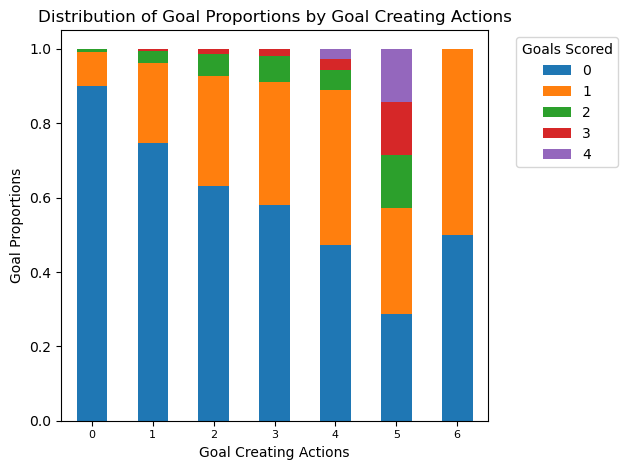

In [24]:
goals_by_gca = att_explore.groupby(['Goal Creating Actions', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_gca = goals_by_gca.div(goals_by_gca.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_gca.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Goal Creating Actions')
ax.set_xlabel('Goal Creating Actions')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

Again, it is surprising to see that the proportion of observations that have recorded a goal is steadily increasing as the number of GCA increases. For the observations that accumulate 5 GCA, almost 70% of them also score at laest 1 goal. Let's subset and have a look at these observations. 

In [25]:
att_explore[att_explore['Goal Creating Actions'] == 5]

,Unnamed: 0,Player ID,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,...,RW,WB,Defenders,Midfielders,Wide Midfielders,Wingers,Penalty Success Rate,SOT Percentage,Team Goals,Pass Completion Percentage
6638,14895,203,Sat,20,Home,W 5–1,Liverpool,Arsenal,Y,"AM,LW",...,0,0,0,0,0,1,1.0,0.750000,5,86.666667
14442,14759,203,Sat,4,Home,W 9–0,Liverpool,Bournemouth,Y,FW,...,0,0,0,0,0,0,NaN,0.800000,9,67.741935
15831,23586,325,Sat,11,Home,W 6–1,Manchester City,Bournemouth,Y,WB,...,0,1,0,0,0,0,NaN,0.333333,6,90.000000
19763,5512,89,Sun,9,Home,W 6–3,Manchester City,Manchester Utd,Y,RM,...,0,0,0,0,1,0,NaN,0.666667,6,82.352941
29962,29841,400,Fri,10,Away,W 9–0,Leicester City,Southampton,Y,LM,...,0,0,0,0,1,0,NaN,0.666667,9,84.848485
30219,22492,312,Sat,25,Away,W 5–0,Arsenal,Burnley,Y,LM,...,0,0,0,0,1,0,NaN,0.500000,5,73.333333
30630,2455,36,Sat,34,Home,W 5–1,Manchester City,Watford,Y,"RW,LW",...,1,0,0,0,0,1,1.0,0.600000,5,86.363636


So there are only 7 observations in the entire dataset that accumulated 5 GCA in one game. We can see that all of these games have a lage number of goals scored. The lowest scoring game involved the player's team scoring 5 goals. Therefore, it may be the case that the players accumulating more GCA's per game are also the same players playing for the teams that score a lot of goals (which is why they are accumulating so many GCA). Since we know from previous data exploration that the teams that proportion of observations scoring at least 1 goal increases as the number of goals the team scores increases, this could potentially explain the relationship between GCA and Goals. To test this, we can separate the dataset based on the number of goals scored by the team for each observation. For different number of goals, we can reproduce the plot above, to see whether the relationship still holds. 

In [26]:
def team_goals_filter (team_goals):
    return att_explore[
    att_explore['Result']
    .str.replace('–', '-', regex=False)  # Replace en dash with hyphen
    .str.split(' ')
    .str[1]
    .str.split('-')
    .str[0]
    .astype(int) == team_goals
]

teamgoals_df = [team_goals_filter(1), team_goals_filter(2), team_goals_filter(3), 
                team_goals_filter(4), team_goals_filter(5), team_goals_filter(6), 
                team_goals_filter(7), team_goals_filter(8), team_goals_filter(9)
                ]
    

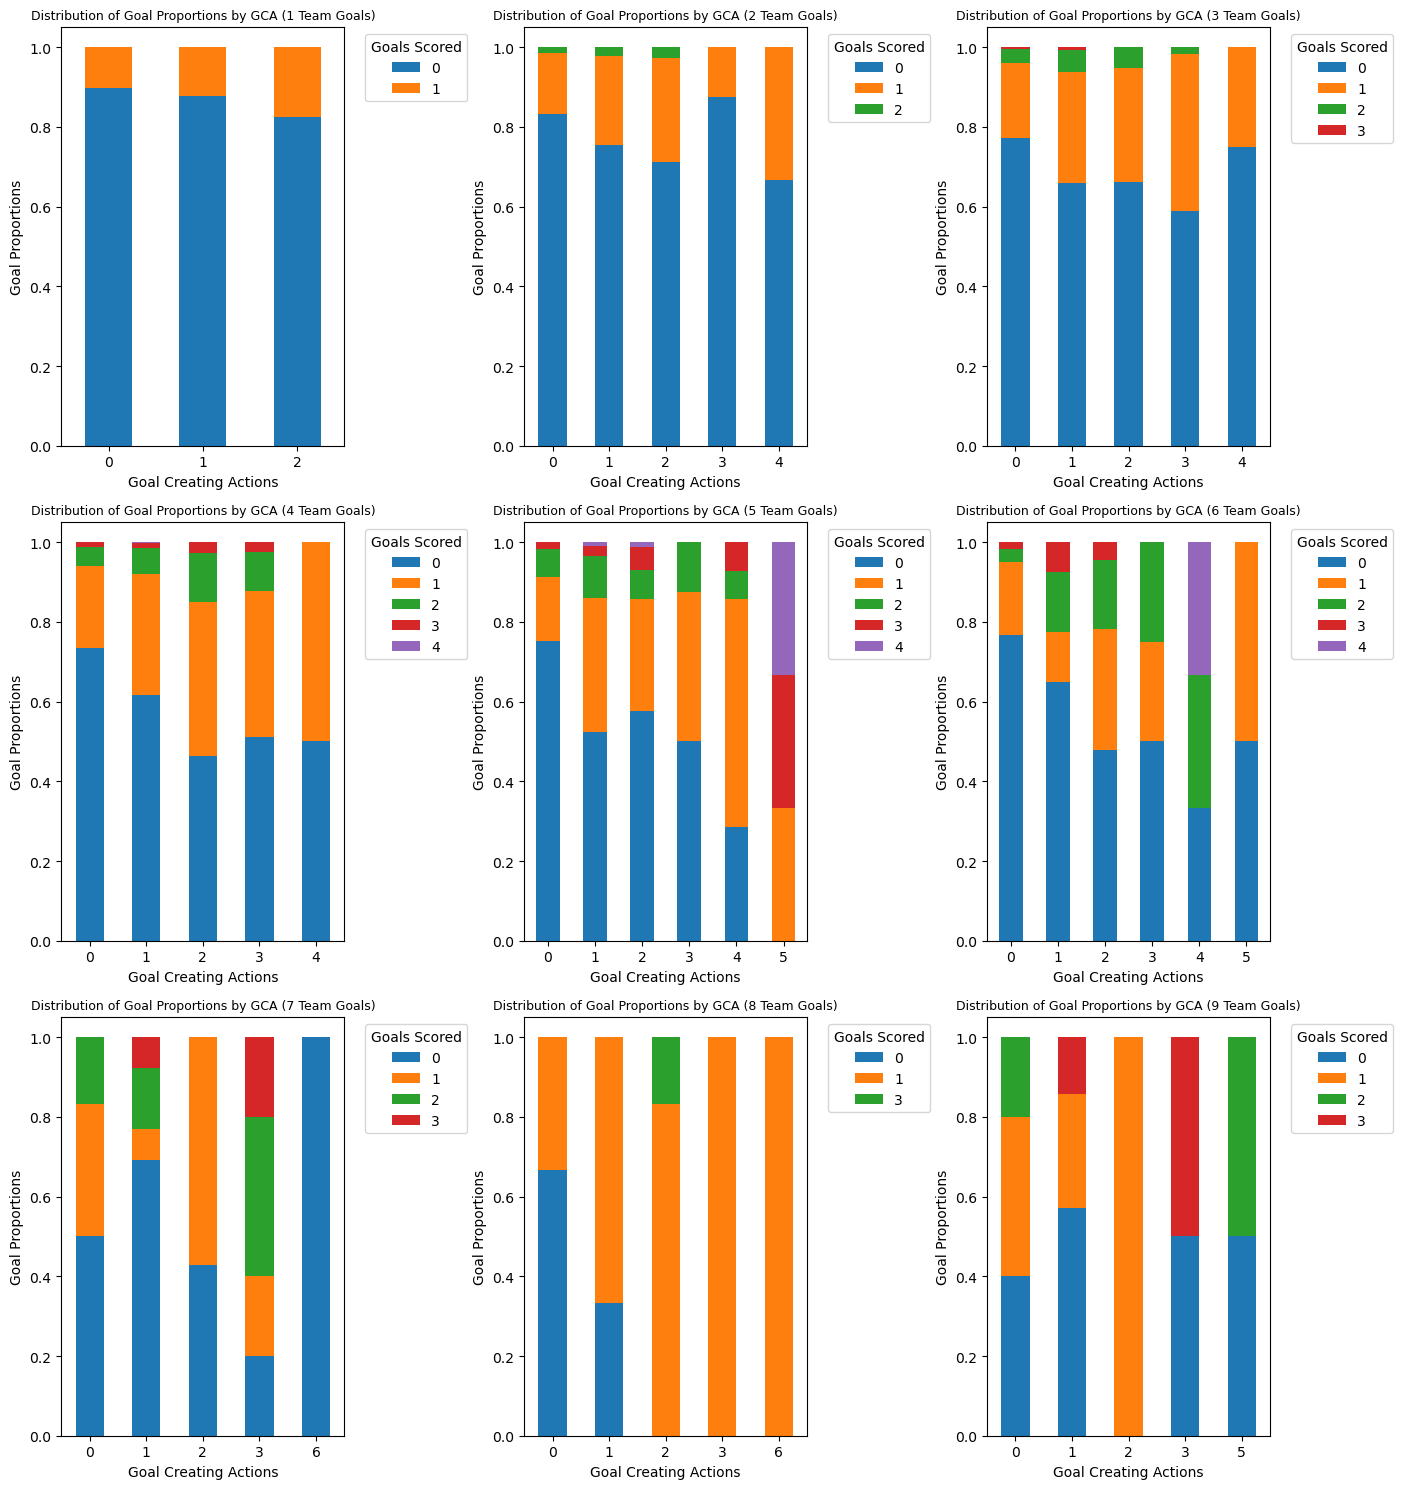

In [27]:
def gca_teamgoals_plotter (df, ax):
    goals_by_gca = df.groupby(['Goal Creating Actions', 'Goals']).size().unstack(fill_value = 0)
    goalprop_by_gca = goals_by_gca.div(goals_by_gca.sum(axis = 1), axis = 0)

    goalprop_by_gca.plot(kind = 'bar', stacked = True, ax = ax)
    ax.set_title(f'Distribution of Goal Proportions by GCA ({i+1} Team Goals)', fontsize=9)  # Dynamic title
    ax.set_xlabel('Goal Creating Actions')
    ax.set_ylabel('Goal Proportions')
    ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')
    ax.tick_params(axis = 'x', rotation = 0)

fig, axs = plt.subplots(3,3, figsize = (15, 15))
axs = axs.flatten()

for i, df in enumerate(teamgoals_df):
    if i < len(axs):
        gca_teamgoals_plotter(df, axs[i])

plt.tight_layout()
plt.subplots_adjust(right = 0.85)
plt.show()


There are a few takeaways from this set of plots. We can see that there is definitely a positive relationship between GCA and Team Goals and how these two features affect goal proportions. For example, we can see that for observations where 1 team goal was scored, the 10% of the observations that also accumulated 1 GCA scored at least 1 goal. This proportion increases to just over 20% when 2 team goals are scored and so on. This pattern continues steadily to 5 team goals, where almost 50% of the observations with 5 team goals and 1 GCA score at least 1 goal. For the observations with more than 5 team goals, this pattern gets a little bit muddied. However, this is most likely due to a small sample size. Regardless of this though, there does still seem to be a relationship between GCA and Goals when keeping Team Goals constant. 

Let's next have a look at the relationship between different types of GCA and Goals. 

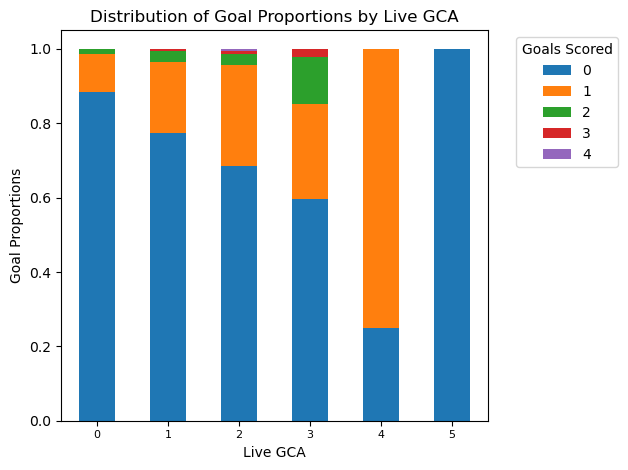

In [28]:
goals_by_livegca = att_explore.groupby(['Live GCA', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_livegca = goals_by_livegca.div(goals_by_livegca.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_livegca.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by Live GCA')
ax.set_xlabel('Live GCA')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 0, size = 8)
plt.tight_layout()
plt.show()

We can see a pretty clear pattern where an increased number of Live GCA accumulated is assoicated with a greater proportion of the observations recording at least 1 goal scored. Let's have a look to see if this pattern continues to hold if we hold Team Goals constant. 

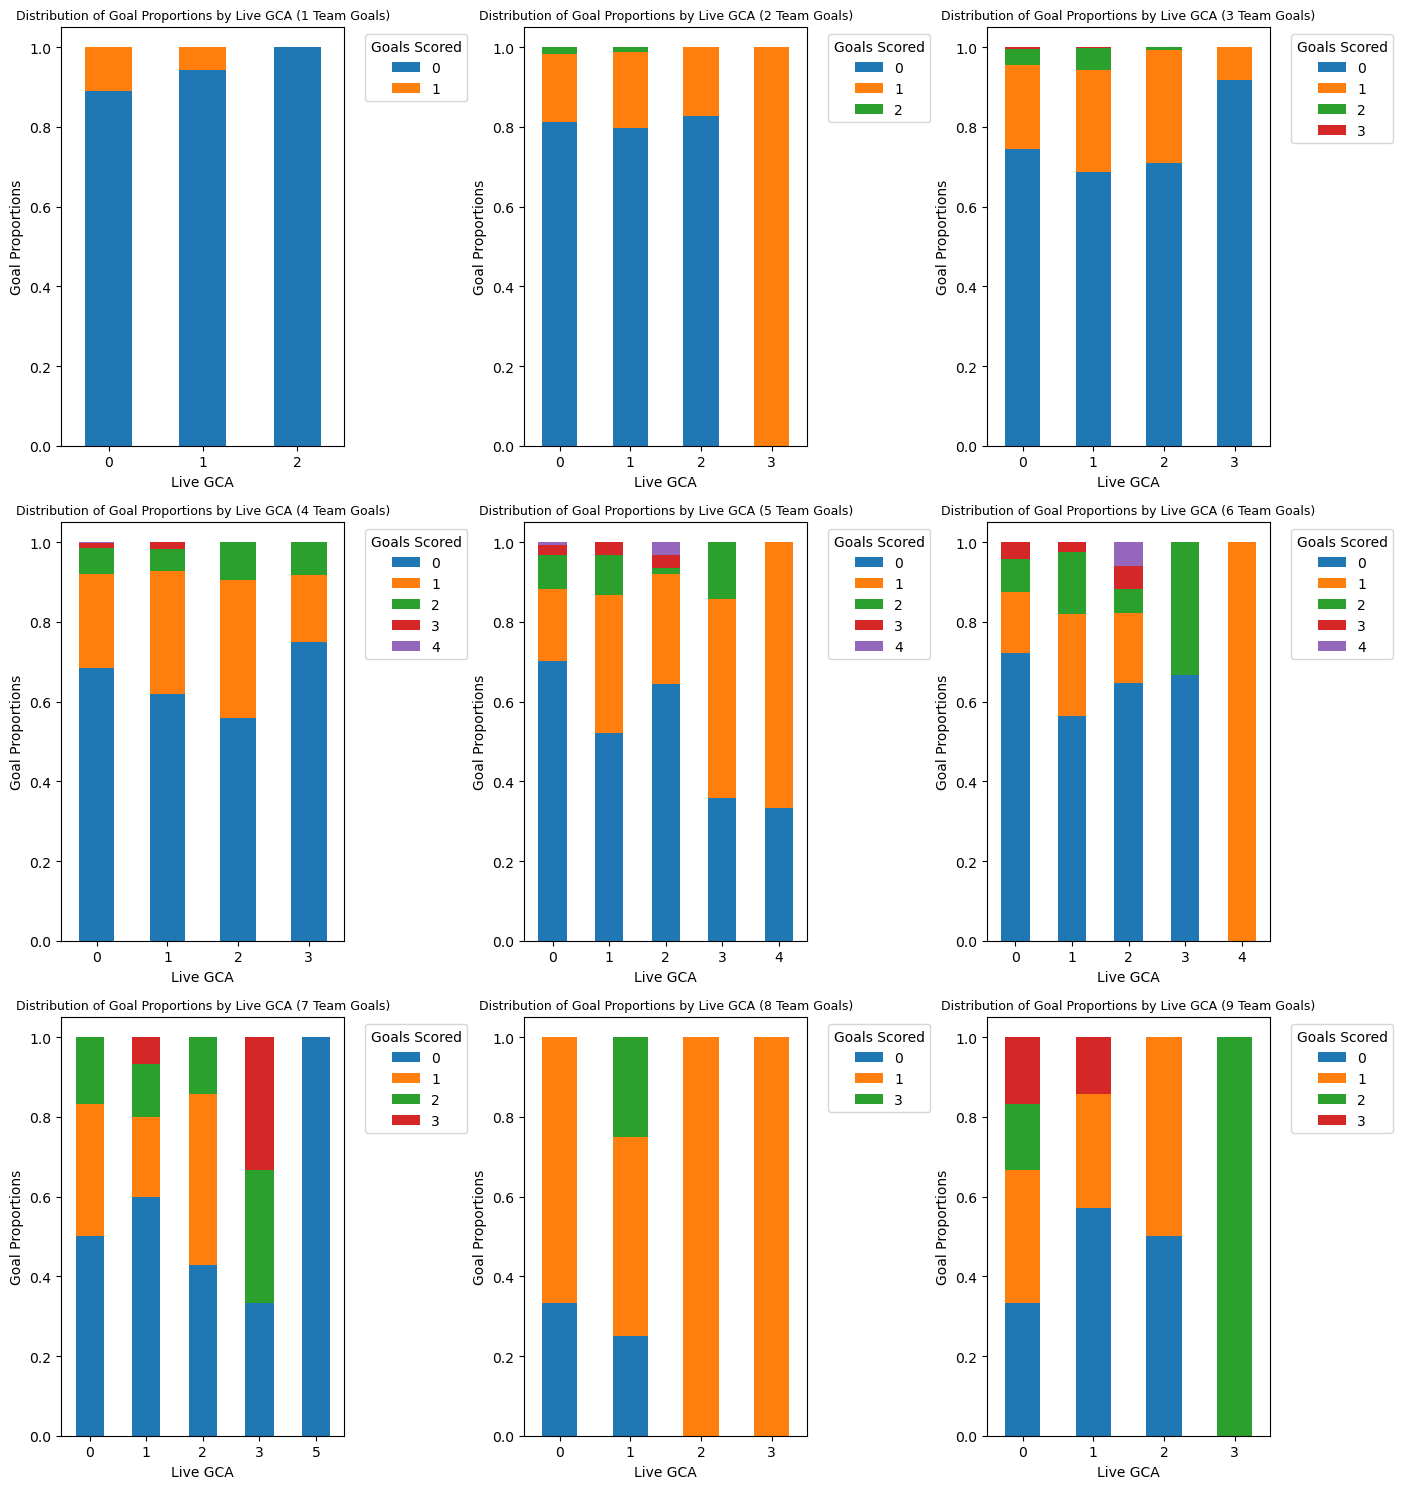

In [29]:
#modify gca_teamgoals_plotter by allowing us to specify the feature we wish to plot, instead of holding it constant at 'Goal Creating Actions' 
def gca_teamgoals_plotter (feature, df, ax):
    goals_by_gca = df.groupby([feature, 'Goals']).size().unstack(fill_value = 0)
    goalprop_by_gca = goals_by_gca.div(goals_by_gca.sum(axis = 1), axis = 0)

    goalprop_by_gca.plot(kind = 'bar', stacked = True, ax = ax)
    ax.set_title(f'Distribution of Goal Proportions by {feature} ({i+1} Team Goals)', fontsize=9)  # Dynamic title
    ax.set_xlabel(f'{feature}')
    ax.set_ylabel('Goal Proportions')
    ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')
    ax.tick_params(axis = 'x', rotation = 0)

fig, axs = plt.subplots(3,3, figsize = (15, 15))
axs = axs.flatten()

for i, df in enumerate(teamgoals_df):
    if i < len(axs):
        gca_teamgoals_plotter('Live GCA', df, axs[i])

plt.tight_layout()
plt.subplots_adjust(right = 0.85)
plt.show()

Looking at this set of plots, it doesn't appear as if there is any significant relationship between Live GCA and the proportion of goals scored. For observations with between 1 to 3 team goals, the proportion of observations that record at least 1 goal is pretty constant when holding team goals constant. However, the proportion increases when the proportion of team goals increases (this is not surprising). The plots look more interesting when the number of team goals is 4 or greater. For example, observations with 8 team goals almost always record at least 1 goal scored regardless of the number of Live GCA accumulated. 

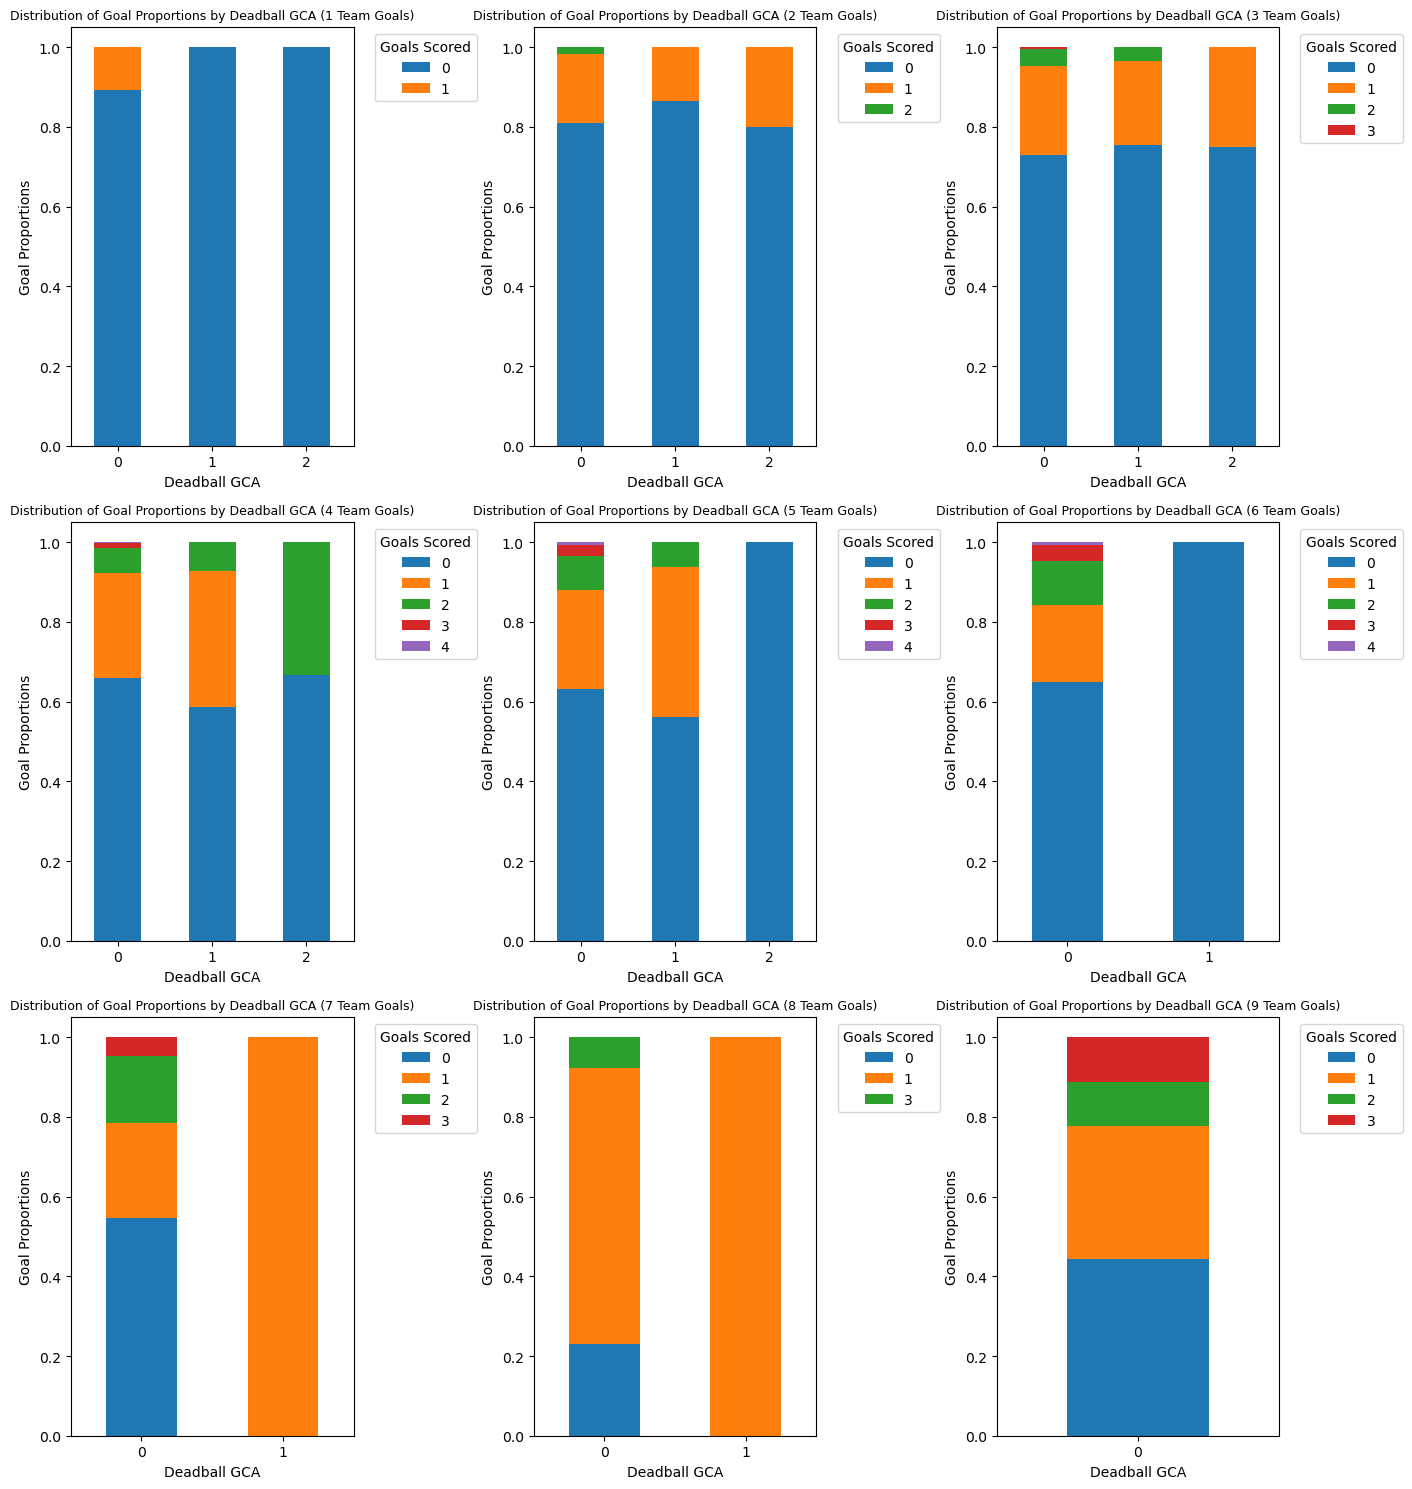

In [30]:
fig, axs = plt.subplots(3,3, figsize = (15, 15))
axs = axs.flatten()

for i, df in enumerate(teamgoals_df):
    if i < len(axs):
        gca_teamgoals_plotter('Deadball GCA', df, axs[i])

plt.tight_layout()
plt.subplots_adjust(right = 0.85)
plt.show()

Once again, we see a similar pattern here where there isn't much variation in the proportion of goals scored for different values of Deadball GCA accumulated when keeping Team Goals constant. 

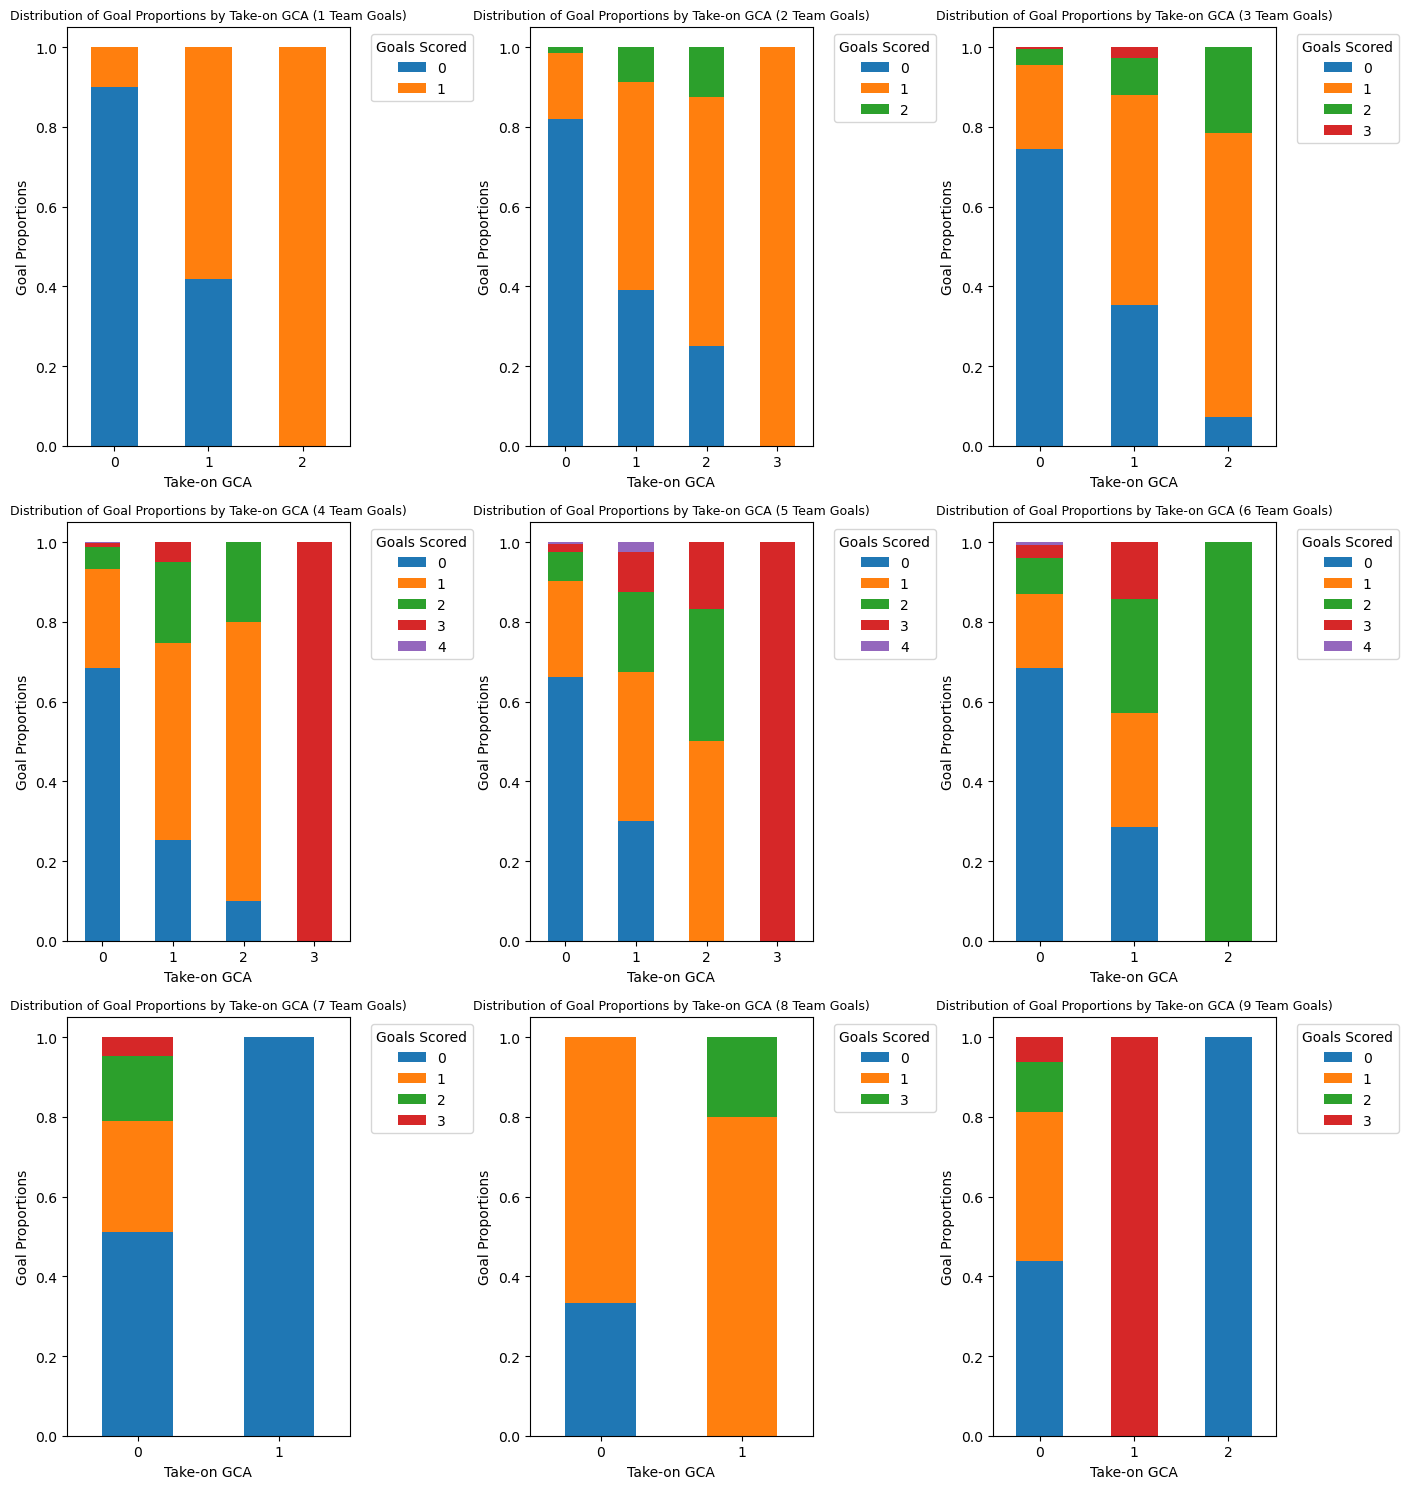

In [31]:
fig, axs = plt.subplots(3,3, figsize = (15, 15))
axs = axs.flatten()

for i, df in enumerate(teamgoals_df):
    if i < len(axs):
        gca_teamgoals_plotter('Take-on GCA', df, axs[i])

plt.tight_layout()
plt.subplots_adjust(right = 0.85)
plt.show()

These set of plots show us that there is potentially quite a strong relationship between the number of Take-on GCA accumulated and Goals. For example, the proportion of observations with 2 team goals,  2 Take-on GCA and at least 1 goal scored is at least 70%. Just to check this isn't a sample size issue, let's look at how many observations have both 2 team goals and 2 take-on GCA. 

In [32]:
teamgoals_df[2].loc[teamgoals_df[2]['Take-on GCA'] == 2]

,Unnamed: 0,Player ID,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,...,RW,WB,Defenders,Midfielders,Wide Midfielders,Wingers,Penalty Success Rate,SOT Percentage,Team Goals,Pass Completion Percentage
375,36566,483,Sun,10,Home,W 3–1,West Ham,Fulham,N,FW,...,0,0,0,0,0,0,NaN,1.000000,3,16.666667
934,37166,489,Mon,28,Home,W 3–2,Chelsea,Newcastle Utd,N,AM,...,0,0,0,0,0,0,NaN,1.000000,3,62.500000
1260,18398,258,Sun,34,Home,W 3–1,Newcastle Utd,Southampton,N,FW,...,0,0,0,0,0,0,NaN,0.500000,3,50.000000
3319,2381,35,Sun,23,Away,L 3–4,Manchester City,Liverpool,Y,LW,...,0,0,0,0,0,1,NaN,0.500000,3,82.352941
8955,22760,313,Sat,11,Home,W 3–1,Everton,Brighton,Y,"FW,RW",...,1,0,0,0,0,1,NaN,0.500000,3,58.333333
10404,36861,487,Sat,10,Home,W 3–0,Watford,Huddersfield,Y,AM,...,0,0,0,0,0,0,NaN,1.000000,3,84.615385
12922,23102,320,Sat,17,Home,W 3–0,Newcastle Utd,Fulham,Y,CM,...,0,0,0,1,0,0,NaN,0.500000,3,86.991870
13610,31257,418,Sat,1,Away,L 3–4,Leeds United,Liverpool,Y,LM,...,0,0,0,0,1,0,NaN,1.000000,3,72.413793
19460,35181,465,Sat,5,Home,D 3–3,Chelsea,Southampton,Y,FW,...,0,0,0,0,0,0,NaN,0.666667,3,88.000000
21290,5217,82,Sat,17,Home,W 3–2,Watford,Cardiff City,Y,"FW,AM",...,0,0,0,0,0,0,NaN,0.333333,3,79.245283


So there are only 14 observations that have both 2 team goals and 2 take-on GCA. So the pattern that we are seeing could potentially be attributed to a lack of sample size. 

In [33]:
teamgoals_df[2].loc[teamgoals_df[2]['Take-on GCA'] == 1]

,Unnamed: 0,Player ID,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,...,RW,WB,Defenders,Midfielders,Wide Midfielders,Wingers,Penalty Success Rate,SOT Percentage,Team Goals,Pass Completion Percentage
16,38830,514,Sat,17,Home,W 3–0,Newcastle Utd,Fulham,Y,LW,...,0,0,0,0,0,1,NaN,0.250000,3,77.272727
485,35919,474,Sat,10,Away,W 3–0,Chelsea,Newcastle Utd,Y,AM,...,0,0,0,0,0,0,NaN,NaN,3,86.885246
527,21904,303,Wed,27,Home,W 3–0,Chelsea,Brighton,Y,LW,...,0,0,0,0,0,1,NaN,0.333333,3,85.915493
694,36529,482,Sat,36,Home,W 3–0,Brentford,Southampton,Y,FW,...,0,0,0,0,0,0,NaN,0.333333,3,47.826087
758,2480,36,Sat,28,Away,W 3–0,Manchester City,Fulham,Y,LW,...,0,0,0,0,0,1,NaN,1.000000,3,84.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30531,39585,526,Sun,30,Home,W 3–0,Newcastle Utd,Sheffield Utd,Y,RM,...,0,0,0,0,1,0,NaN,1.000000,3,77.419355
30937,7378,113,Fri,6,Away,W 3–0,Leeds United,Aston Villa,Y,CM,...,0,0,0,1,0,0,NaN,0.500000,3,79.104478
31150,25601,350,Sat,29,Home,D 3–3,Brighton,Brentford,Y,"RW,LB,RM",...,1,0,1,0,1,1,NaN,0.500000,3,77.358491
31235,37333,493,Thu,20,Away,W 3–2,Arsenal,Crystal Palace,Y,"AM,FW",...,0,0,0,0,0,0,NaN,0.750000,3,79.687500


To further reiterate this point, we can see that there are only 116 observations that simultaneously have 1 Take-on GCA and 2 Team Goals. 

Something else we can investigate is the relationship between Goals and the proportion of GCA over Team Goals. In other words, we can group observations by how the number of GCA accumulated is related to the Team Goals. So observations with 1 GCA and 2 Team Goals will be grouped together with observations that have 2 GCA and 4 Team Goals. Grouping observations in this manner is essentially a way of grouping observations by attacking involvement. For example, observations that have a high attacking involvement may be more likely to score more goals because they are more involved in the attacking phases of the game (i.e. they are consistently in positions to both accumulate GCA and goals). However, we need to first check the relationship between GCA and Team Goals. I want to see whether or not there are any observations with more GCA than Team Goals (there shouldn't be, because GCA should only be accumulated when a team goal is scored.)

In [34]:
gca_greaterthan_teamgoals_counter = []

for i, df in enumerate(teamgoals_df):
    count = (df['Goal Creating Actions'] > i+1).sum()
    gca_greaterthan_teamgoals_counter.append(
        f'For DataFrame {i}, the number of observations that have more GCA than Team Goals is {count}'
    )
gca_greaterthan_teamgoals_counter

['For DataFrame 0, the number of observations that have more GCA than Team Goals is 91',
 'For DataFrame 1, the number of observations that have more GCA than Team Goals is 27',
 'For DataFrame 2, the number of observations that have more GCA than Team Goals is 8',
 'For DataFrame 3, the number of observations that have more GCA than Team Goals is 0',
 'For DataFrame 4, the number of observations that have more GCA than Team Goals is 0',
 'For DataFrame 5, the number of observations that have more GCA than Team Goals is 0',
 'For DataFrame 6, the number of observations that have more GCA than Team Goals is 0',
 'For DataFrame 7, the number of observations that have more GCA than Team Goals is 0',
 'For DataFrame 8, the number of observations that have more GCA than Team Goals is 0']

So there are actually a few observations that have more GCA than Team Goals (predominantly when the number of Team Goals is not particularly high). This doesn't really make sense to me, let's investigate further by looking at the observations that have 1 team goal, but more than 1 GCA. 

In [35]:
teamgoals_df[0][(teamgoals_df[0]['Goal Creating Actions'] > 1)]

,Unnamed: 0,Player ID,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,...,RW,WB,Defenders,Midfielders,Wide Midfielders,Wingers,Penalty Success Rate,SOT Percentage,Team Goals,Pass Completion Percentage
729,15131,204,Sat,28,Away,L 1–4,West Ham,Liverpool,Y,CM,...,0,0,0,1,0,0,NaN,NaN,1,64.000000
730,26819,364,Sat,18,Home,D 1–1,Manchester City,Everton,Y,RW,...,1,0,0,0,0,1,NaN,0.500000,1,87.719298
1434,2047,30,Sat,12,Away,W 1–0,Aston Villa,Wolves,Y,LM,...,0,0,0,0,1,0,NaN,0.000000,1,62.162162
1828,9893,139,Fri,18,Away,D 1–1,Sheffield Utd,Aston Villa,N,AM,...,0,0,0,0,0,0,NaN,NaN,1,90.000000
2010,17932,246,Sat,13,Home,L 1–2,Burnley,West Ham,Y,LM,...,0,0,0,0,1,0,NaN,1.000000,1,85.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30354,11226,156,Wed,28,Away,L 1–5,Bournemouth,Arsenal,Y,CM,...,0,0,0,1,0,0,NaN,0.333333,1,75.000000
30549,35123,464,Sat,2,Away,W 1–0,West Brom,Burnley,N,"FW,LM",...,0,0,0,0,1,0,NaN,0.500000,1,66.666667
31141,6980,108,Wed,24,Away,L 1–4,West Ham,Leicester City,Y,FW,...,0,0,0,0,0,0,NaN,NaN,1,48.387097
31560,16280,221,Sat,37,Away,L 1–2,Burnley,Tottenham,Y,CM,...,0,0,0,1,0,0,NaN,NaN,1,100.000000


When looking at the first few observations in this list and going back through these games, we can see that it is possible to accumulate more than 1 GCA for each team goal if the player is performing two consecutive GCA that leads to a goal. The first observation involves a West Ham midfielder (Cheikhou Kouyate) accumulating 2 GCA even though West Ham only scored 1 goal. This was because the goal scored by West Ham involved Kouyate first making a tackle to win possession of the ball, followed by a through ball (live pass) which found the West Ham striker for a goal. Therefore, the last two actions leading to the goal were both performed by Kouyate, which is why he was able to accumulate two GCA despite the team only scoring 1 goal. The second observation involves a Manchester City right winger (Riyad Mahrez) also accumulating 2 GCA for 1 team goal. In this occasion, Mahrez first dribbled past a player (Take-on GCA), followed by a cut back (Live GCA) leading to a goal. Based on these two examples, we can see how it is possible to accumulate more GCA than Team Goals. 

In [36]:
teamgoals_df[0][(teamgoals_df[0]['Goal Creating Actions'] > 1) & (teamgoals_df[0]['Goals'] > 0)]

,Unnamed: 0,Player ID,Day,Matchweek,Venue,Result,Team,Opponent,Start,Position,...,RW,WB,Defenders,Midfielders,Wide Midfielders,Wingers,Penalty Success Rate,SOT Percentage,Team Goals,Pass Completion Percentage
4066,29641,398,Sat,26,Away,L 1–3,West Ham,Brighton,Y,FW,...,0,0,0,0,0,0,NaN,1.000000,1,68.000000
4512,12505,175,Mon,2,Home,D 1–1,Liverpool,Crystal Palace,Y,"LW,FW",...,0,0,0,0,0,1,NaN,0.666667,1,77.777778
11283,18020,248,Sat,5,Away,W 1–0,Southampton,Sheffield Utd,Y,"AM,WB",...,0,1,0,0,0,0,NaN,1.000000,1,83.333333
11769,10582,147,Sat,35,Away,W 1–0,Fulham,Bournemouth,Y*,FW,...,0,0,0,0,0,0,1.0,0.250000,1,81.250000
12301,24154,334,Sun,7,Away,D 1–1,Liverpool,Newcastle Utd,Y,LM,...,0,0,0,0,1,0,NaN,0.200000,1,78.378378
15738,31013,416,Wed,15,Away,L 1–2,Tottenham,Manchester Utd,Y,AM,...,0,0,0,0,0,0,NaN,1.000000,1,73.684211
17614,5190,82,Sat,11,Home,L 1–2,Watford,Chelsea,Y,"FW,RM",...,0,0,0,0,1,0,1.0,0.000000,1,75.000000
17742,15798,213,Mon,34,Home,L 1–2,Burnley,West Ham,Y,FW,...,0,0,0,0,0,0,1.0,NaN,1,65.000000
17977,11532,159,Sat,25,Away,D 1–1,Chelsea,Southampton,Y,AM,...,0,0,0,0,0,0,1.0,0.000000,1,72.000000
18411,35267,467,Tue,22,Away,L 1–2,Arsenal,Wolves,Y,LW,...,0,0,0,0,0,1,NaN,1.000000,1,85.000000


From the above, we can also see that there are 16 observations where the player scored 1 goal, were involved in a game with 1 team goal, and also accumulated more than 1 GCA. In other words, there are 16 observations where the player scored the only goal of the game for their team, whilst accumulating more than 1 GCA in the process. The second observation in thte list involves a Liverpool LW (Luis Diaz) who both scored the only goal for the team in that game, whilst accumulating 2 GCA. The video shows that Diaz dribbled past two players (2 take-on GCA) before scoring, which is how he is able to both score whilst accumulating 2 GCA.  Similarly, the first observation (Javier Hernandez, West Ham) also involves a player who dribbled past two players (2 take-on GCA) before scoring the only game of the game for their team. 

In [37]:
#adding feature 'Team Goals' to att_explore, which is just the number of team goals scored by each observation
att_explore['Team Goals'] = (
    att_explore['Result']
    .str.replace('–', '-', regex=False)  # Replace en dash with hyphen
    .str.split(' ')  # Split by space
    .str[1]  # Get the second part (the score)
    .str.split('-')  # Split the score by hyphen
    .str[0]  # Extract the first team's goals
    .astype(int)  # Convert to integer
)

att_explore[['Day', 'Matchweek', 'Venue', 'Result', 'Team', 'Opponent', 'Team Goals']].head()

,Day,Matchweek,Venue,Result,Team,Opponent,Team Goals
0,Sun,32,Away,L 1–2,Crystal Palace,Leicester City,1
1,Sat,29,Away,L 1–2,Bournemouth,Liverpool,1
2,Sun,37,Away,D 0–0,Huddersfield,Manchester City,0
3,Sun,34,Away,D 2–2,Southampton,Brighton,2
4,Sun,38,Home,W 5–0,Manchester City,Norwich City,5


In [38]:
#creating a new list which captures information about the the involvement each observation has given the Team Goals scored in the game played by
#each observation, this is done by looking at the GCA recorded for each observation, and dividing this value by the number of Team Goals scored 
#by this observation

gca_teamgoals_prop = (att_explore['Goal Creating Actions'] / att_explore['Team Goals']).tolist()
pd.Series(gca_teamgoals_prop).unique()

array([0.        ,        nan, 0.4       , 0.33333333, 1.        ,
       0.5       , 0.66666667, 0.2       , 0.25      , 1.33333333,
       0.6       , 1.5       , 0.75      , 2.        , 0.8       ,
       0.375     , 0.14285714, 0.85714286, 0.28571429, 0.11111111,
       0.16666667, 0.22222222, 0.42857143, 0.55555556, 0.83333333,
       0.125     ])

In [39]:
# Replace values based on conditions, purpose is to reduce the number of unique values (grouping)
for i in range(len(gca_teamgoals_prop)):
    if np.isnan(gca_teamgoals_prop[i]):
        gca_teamgoals_prop[i] = 'No Team Goals'  # Assigning a value
    elif gca_teamgoals_prop[i] == 0:
        gca_teamgoals_prop[i] = '0% Involvement'
    elif 0 < gca_teamgoals_prop[i] <= 0.25:
        gca_teamgoals_prop[i] = '0-25% Involvement'
    elif 0.25 < gca_teamgoals_prop[i] <= 0.5:
        gca_teamgoals_prop[i] = '25-50% Involvement'
    elif 0.5 < gca_teamgoals_prop[i] <= 0.75:
        gca_teamgoals_prop[i] = '50-75% Involvement'
    elif 0.75 < gca_teamgoals_prop[i] <= 1:
        gca_teamgoals_prop[i] = '75-100% Involvement'
    elif gca_teamgoals_prop[i] == 1:
        gca_teamgoals_prop[i] = '100% Involvement'
    elif gca_teamgoals_prop[i] > 1:
        gca_teamgoals_prop[i] = '> 100% Involvement'

In [40]:
gca_teamgoals_df = pd.DataFrame({
        'GCA Team Goals Prop': gca_teamgoals_prop,  
        'Goals': att_explore['Goals'].tolist(), 
        'Assists': att_explore['Assists'].tolist()    
    })

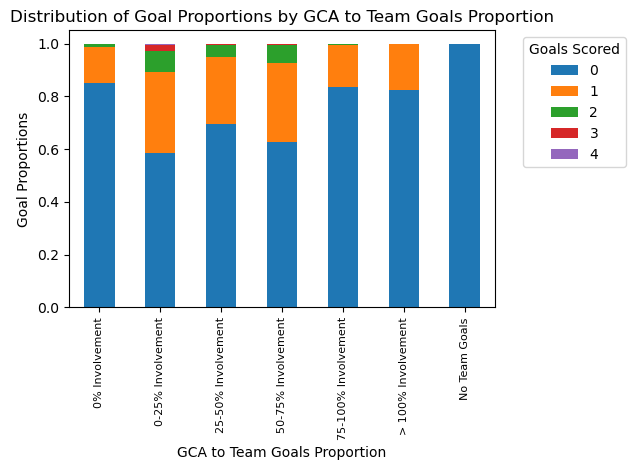

In [41]:
goals_by_gcateamgoalsprop = gca_teamgoals_df.groupby(['GCA Team Goals Prop', 'Goals']).size().unstack(fill_value = 0)
goalprop_by_gcateamgoalsprop = goals_by_gcateamgoalsprop.div(goals_by_gcateamgoalsprop.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

goalprop_by_gcateamgoalsprop.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Goal Proportions by GCA to Team Goals Proportion')
ax.set_xlabel('GCA to Team Goals Proportion')
ax.set_ylabel('Goal Proportions')
ax.legend(title = 'Goals Scored', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

This plot shows that there is no real relationship that we can identify between the feature 'GCA to Team Goals Proportion' and the proportion of observations that recorded at least 1 goal. Surprisingly, the observations that recorded between 0 and 25% involvement (i.e. the observations whose number of GCA is only between 0 and 25% when divided by Team Goals) had the highest proportion of observations with at least 1 goal (just over 40%). This number then decreases, with only 20% of the observations that record between 75-100% involvement recording at least 1 goal. Given the conclusions from above, we expected the proportion of obsevations with at least 1 goal to increase as the GCA to Team Goals proportion increases. Clearly, this is not the case though. 

We can also have a quick look at the relationship between GCA to Team Goals Proportion and Assists. 

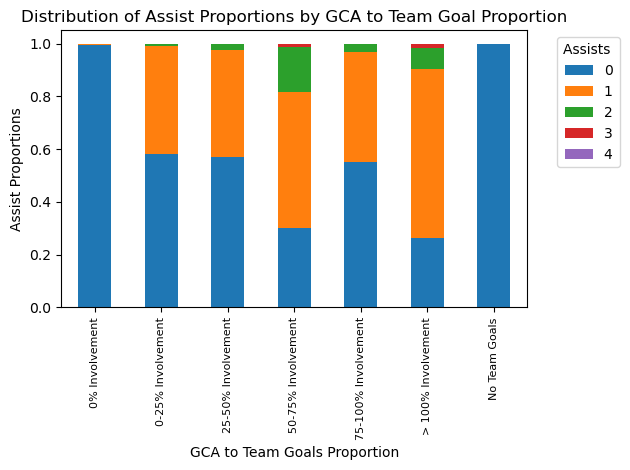

In [42]:
assists_by_gcateamgoalsprop = gca_teamgoals_df.groupby(['GCA Team Goals Prop', 'Assists']).size().unstack(fill_value = 0)
assistprop_by_gcateamgoalsprop = assists_by_gcateamgoalsprop.div(assists_by_gcateamgoalsprop.sum(axis = 1), axis = 0)

fig, ax = plt.subplots()

assistprop_by_gcateamgoalsprop.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Distribution of Assist Proportions by GCA to Team Goal Proportion')
ax.set_xlabel('GCA to Team Goals Proportion')
ax.set_ylabel('Assist Proportions')
ax.legend(title = 'Assists ', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.subplots_adjust(right = 0.85)

plt.xticks(rotation = 90, size = 8)
plt.tight_layout()
plt.show()

Again, we don't really see a relationship between the GCA to Team Goals Proportion and Assists. Therefore, we can probably discard this feature. 

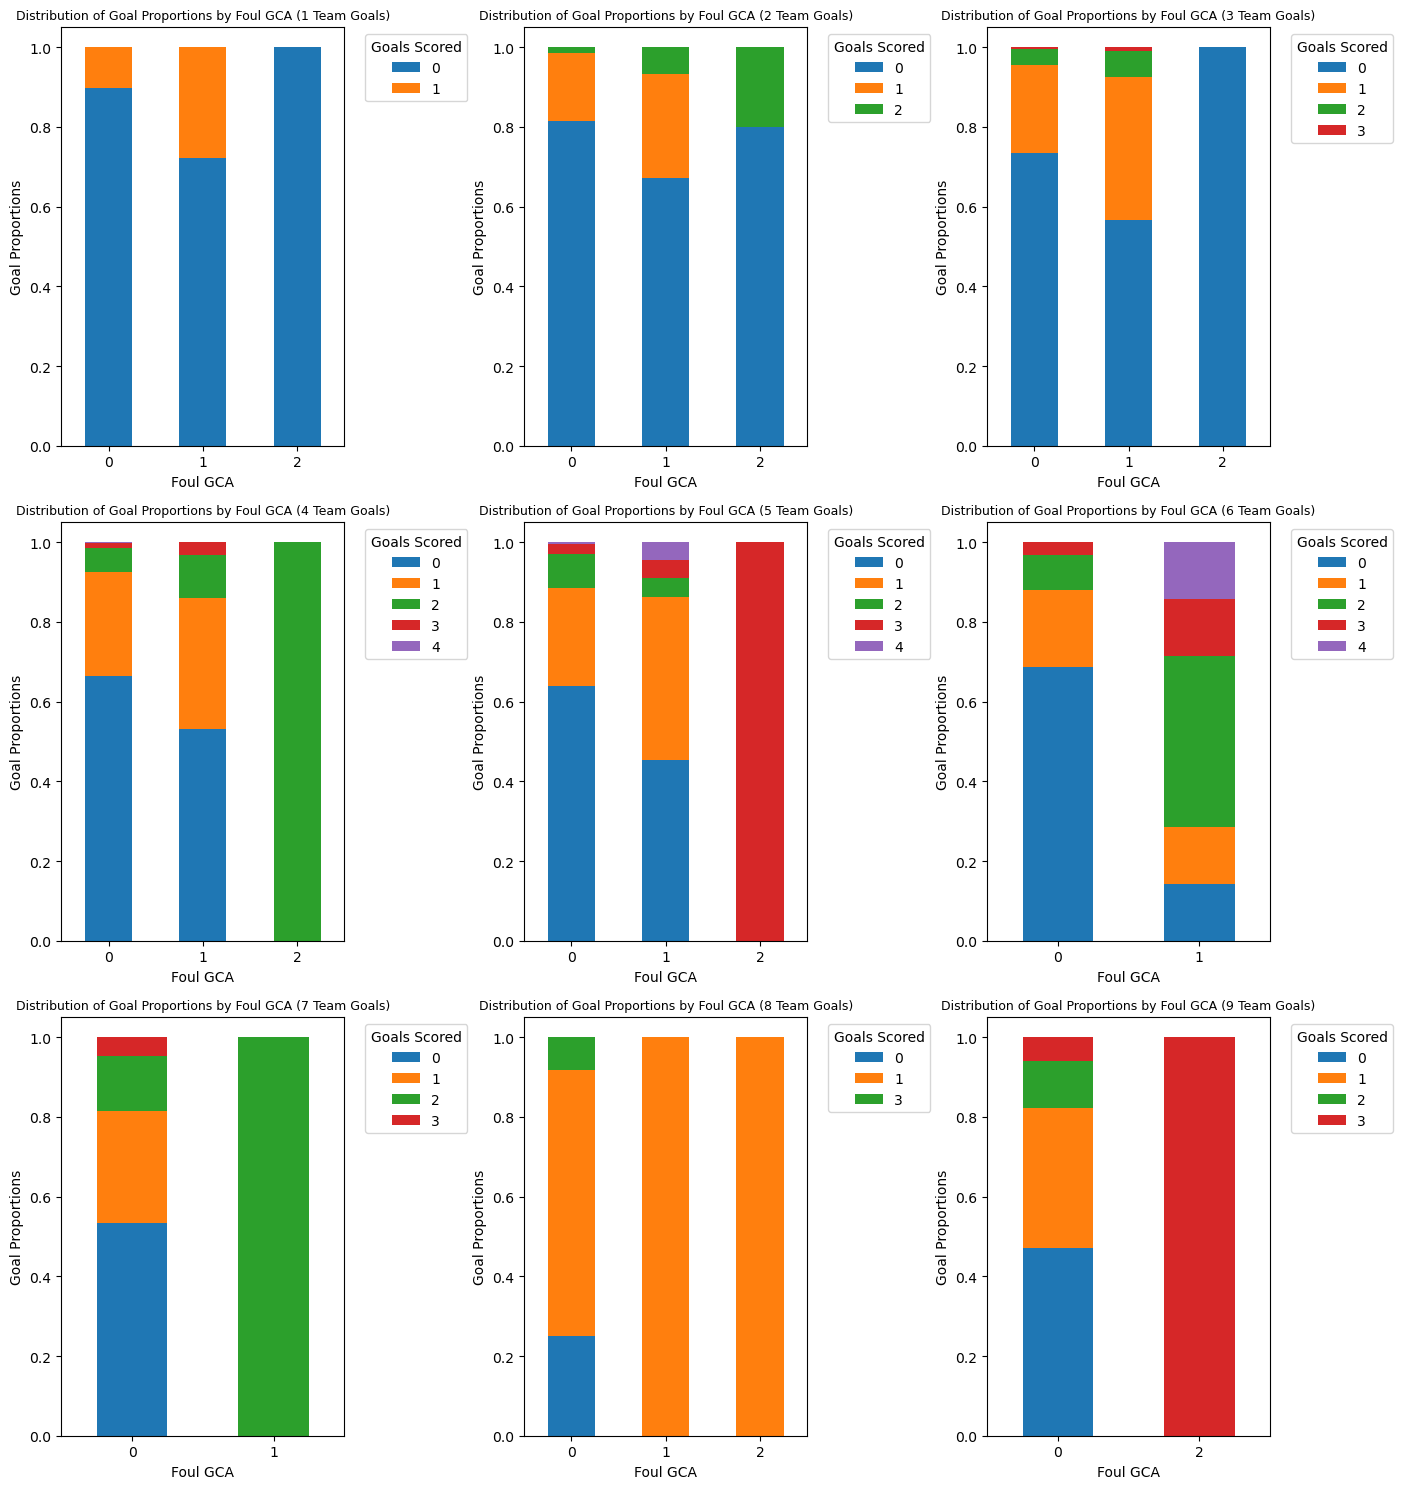

In [43]:
fig, axs = plt.subplots(3,3, figsize = (15, 15))
axs = axs.flatten()

for i, df in enumerate(teamgoals_df):
    if i < len(axs):
        gca_teamgoals_plotter('Foul GCA', df, axs[i])

plt.tight_layout()
plt.subplots_adjust(right = 0.85)
plt.show()